# 🛠 02. Neural network classification with TensorFlow Exercises

## 1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?

Answer:<br>
**Learning rate reduction:**
- 👎 La réduction du learning rate ralenti sa convergence;
- 👍 Le rend plus stable;
- 👎 Mais il y a le risque de rester dans un minima local.

**Learning rate increasing:**
- 👍 Converge plus rapidement;
- 👎 Risque d'instabilité;
- 👍 Evite les minima locaux.

## 2. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the TensorFlow Playground website. Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*

### 1.1 Circle dataset generation

In [2]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

In [3]:
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
input_shape=X.shape[1]
input_shape

2

In [5]:
import pandas as pd
data_dict = {"X0":X[:, 0],
             "X1":X[:, 1],
             "label":y}
df_raw_data = pd.DataFrame(data_dict)
df_raw_data

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


### 1.2 Dataset balancing check

In [6]:
df_raw_data['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

### 1.3 Plot dataset

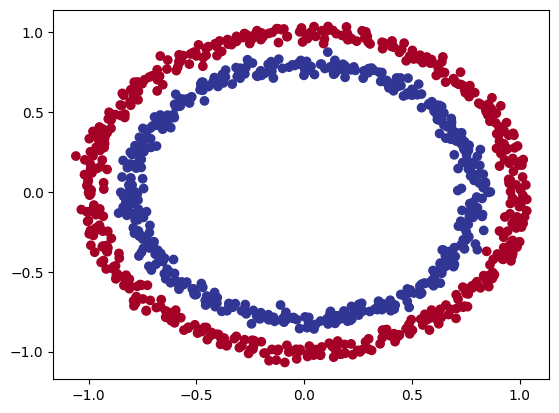

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### 1.4 Normalization

Vu les valeurs min max, il n'y a pas lieu de normaliser les features

In [8]:
X.min(), X.max()

(-1.0677683182718436, 1.0360036756154805)

### 1.5 Build, compile the model and check it's summary

In [9]:
import tensorflow as tf

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6,
                          input_shape=[input_shape],
                          activation=tf.keras.activations.relu),
                          # input_shape previously determined=2
    tf.keras.layers.Dense(units=6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=6, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid),
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              # learning_rate same as default value
              metrics=tf.keras.metrics.BinaryAccuracy())

# Check the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (7

## 3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

### 3.1 Moon dataset generation
NB. I've increased the noise to 0.25


In [11]:
from sklearn.datasets import make_moons

In [12]:
X, y = make_moons(n_samples=1000, noise=0.25, random_state=42)

In [13]:
X.shape, y.shape

((1000, 2), (1000,))

In [14]:
input_shape= X.shape[1]
input_shape

2

In [15]:
import pandas as pd
data_dict = {"X0":X[:, 0],
             "X1":X[:, 1],
             "label":y}
df_raw_data = pd.DataFrame(data_dict)
df_raw_data

,X0,X1,label
0,-0.141765,0.558236,1
1,1.197966,-0.303995,1
2,0.759391,0.110250,1
3,0.023315,-0.603563,1
4,-0.807980,0.548466,0
...,...,...,...
995,0.848422,0.389687,0
996,-0.212638,0.794322,0
997,1.749283,-0.469133,1
998,-1.038129,0.071008,0


### 3.2 Dataset balancing check

In [16]:
df_raw_data['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

### 3.3 Plot dataset

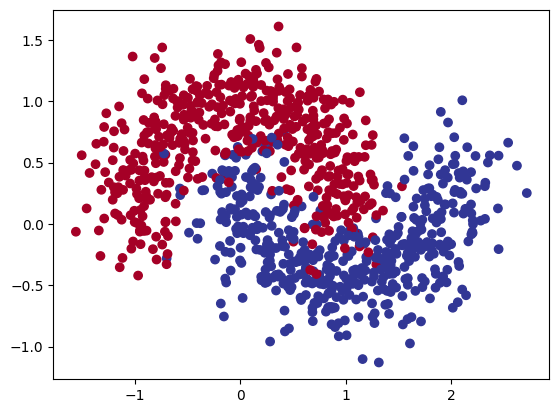

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

### 3.4 Normalization
Vu les valeurs min max, il n'y a pas lieu de normaliser les features

In [18]:
X.min(), X.max()

(-1.5565518788303545, 2.7156776995746625)

### 3.5 Dataset splitting

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.6 Fit the dataset

In [20]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
25/25 [==============================] - 8s 34ms/step - loss: 0.6834 - binary_accuracy: 0.5450 - val_loss: 0.6809 - val_binary_accuracy: 0.5800
Epoch 2/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6700 - binary_accuracy: 0.6513 - val_loss: 0.6670 - val_binary_accuracy: 0.6200
Epoch 3/100
25/25 [==============================] - 0s 14ms/step - loss: 0.6516 - binary_accuracy: 0.6650 - val_loss: 0.6478 - val_binary_accuracy: 0.6300
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6290 - binary_accuracy: 0.6612 - val_loss: 0.6250 - val_binary_accuracy: 0.6550
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6019 - binary_accuracy: 0.7437 - val_loss: 0.5974 - val_binary_accuracy: 0.7300
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 0.5729 - binary_accuracy: 0.7862 - val_loss: 0.5708 - val_binary_accuracy: 0.7400
Epoch 7/100
25/25 [==============================] - 0s 13ms/step -

### 3.7 Predict

In [21]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 3ms/step


### 3.8 Make the confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(5, 5), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

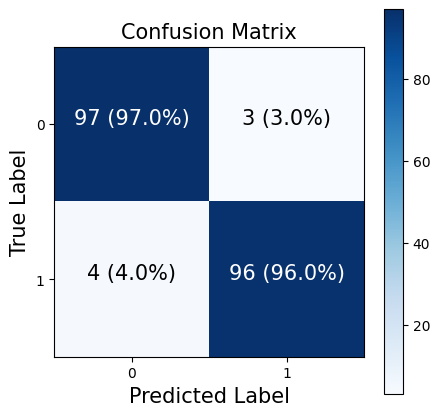

In [23]:
make_confusion_matrix(y_true=y_test,
                      y_pred=tf.round(y_pred))

### 3.9 Check the accuracy of the model

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.1639 - binary_accuracy: 0.9650
Model loss on the test set: 0.16392698884010315
Model accuracy on the test set: 96.50%


## 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

## 4.1 Get data

In [25]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


## 4.2 Normalize data

In [26]:
train_data.min(), train_data.max()

(0, 255)

In [27]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0
print(f"train_data_norm: {train_data_norm.min()} to {train_data_norm.max()}")
print(f"test_data_norm: {test_data_norm.min()} to {test_data_norm.max()}")

train_data_norm: 0.0 to 1.0
test_data_norm: 0.0 to 1.0


### 4.5 Build, compile and fit the model

In [28]:
train_data[0].shape

(28, 28)

In [29]:
input_shape = train_data[0].shape

In [30]:
len(np.unique(train_labels))

10

In [31]:
output_shape = len(np.unique(train_labels))

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=output_shape, activation=tf.keras.activations.softmax)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.SparseCategoricalAccuracy())

# Fit the model
model_2.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 1.3992 - sparse_categorical_accuracy: 0.4611 - val_loss: 1.0456 - val_sparse_categorical_accuracy: 0.5985
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9616 - sparse_categorical_accuracy: 0.6210 - val_loss: 0.9183 - val_sparse_categorical_accuracy: 0.6397
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7657 - sparse_categorical_accuracy: 0.7174 - val_loss: 0.6841 - val_sparse_categorical_accuracy: 0.7673
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6201 - sparse_categorical_accuracy: 0.7948 - val_loss: 0.6120 - val_sparse_categorical_accuracy: 0.7984
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5761 - sparse_categorical_accuracy: 0.8062 - val_loss: 0.6034 - val_sparse_categorical_accuracy: 0.7925
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5539 - s

L'accuracy n'est pas encore suffisant 80% ...
Je recherche le learning rate idéal

In [33]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=output_shape, activation=tf.keras.activations.softmax)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.SparseCategoricalAccuracy())

# Creat the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_best_lr_history = model_3.fit(train_data_norm,
                                   train_labels,
                                   epochs=40,
                                   validation_data=(test_data_norm, test_labels),
                                   callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2932 - sparse_categorical_accuracy: 0.5730 - val_loss: 0.8833 - val_sparse_categorical_accuracy: 0.7121 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7583 - sparse_categorical_accuracy: 0.7312 - val_loss: 0.7264 - val_sparse_categorical_accuracy: 0.7561 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6467 - sparse_categorical_accuracy: 0.7834 - val_loss: 0.6280 - val_sparse_categorical_accuracy: 0.7965 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5851 - sparse_categorical_accuracy: 0.8042 - val_loss: 0.5989 - val_sparse_categorical_accuracy: 0.8005 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5603 - sparse_categorical_accuracy: 0.8092 - val_loss: 0.5854 - val_sparse_categorical_accuracy: 0.8025 - lr: 0.0016
Epoch 6/40
1875/1875 [==

J'analyse la courbe pour voir quel est le meilleur learning rate

In [34]:
find_best_lr_history.history["loss"]

[1.293165683746338,
 0.7583432793617249,
 0.6467239856719971,
 0.5850940942764282,
 0.5603272914886475,
 0.549401581287384,
 0.5411003828048706,
 0.5349330306053162,
 0.5298725962638855,
 0.5267632007598877,
 0.5267878174781799,
 0.5215552449226379,
 0.520634651184082,
 0.5214799046516418,
 0.5224745869636536,
 0.5250676870346069,
 0.5243061184883118,
 0.5304682850837708,
 0.5280362367630005,
 0.5334142446517944,
 0.537635087966919,
 0.5453506708145142,
 0.5547362565994263,
 0.5606341361999512,
 0.5695601105690002,
 0.5776396989822388,
 0.5904825925827026,
 0.604101836681366,
 0.6323610544204712,
 0.6562723517417908,
 0.6672499179840088,
 0.71866774559021,
 0.7398176193237305,
 0.7926614880561829,
 0.8854425549507141,
 0.9793313145637512,
 1.050552248954773,
 1.8330864906311035,
 1.8079485893249512,
 1.870644211769104]

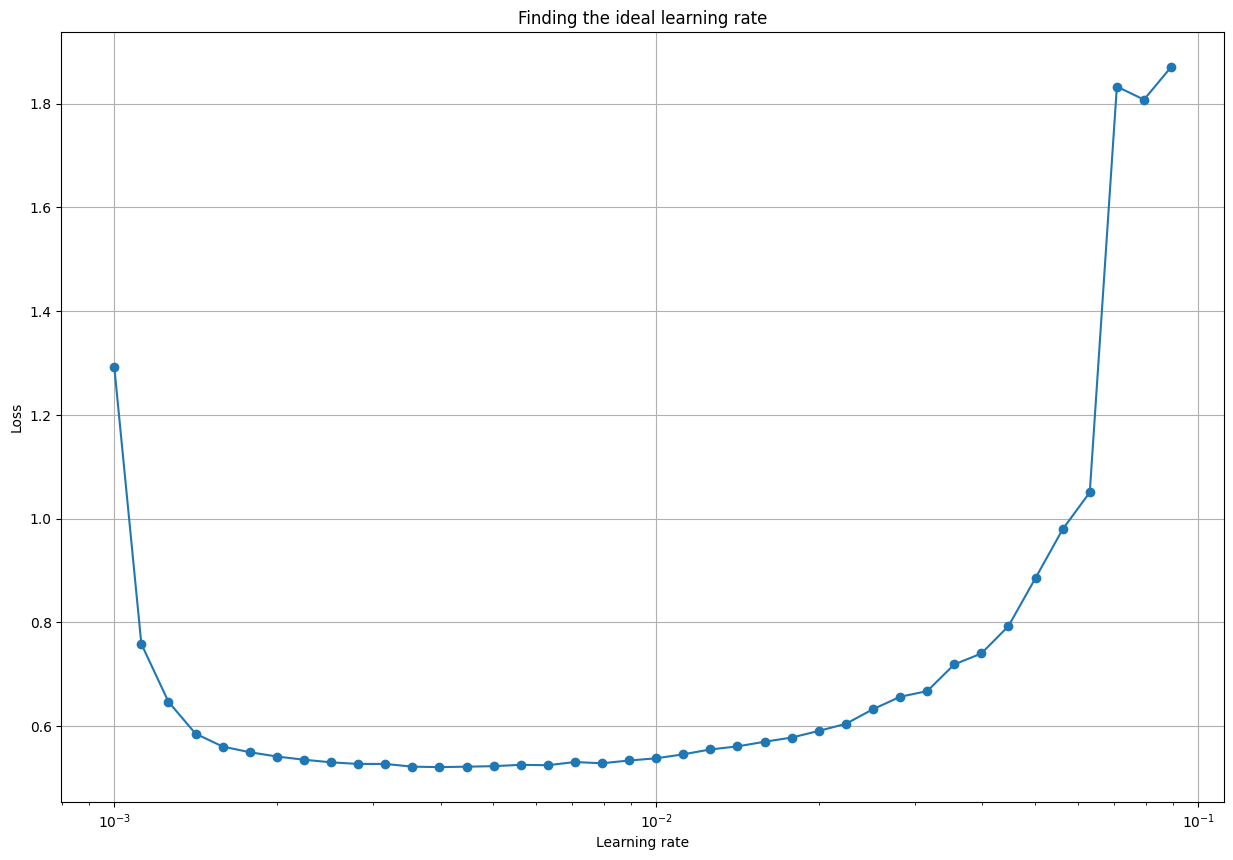

In [35]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(tf.range(40)/20)) # 40 = numbs of epochs
plt.figure(figsize=(15, 10))
plt.semilogx(lrs, find_best_lr_history.history["loss"], '-o')
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")
plt.grid(True)

In [36]:
best_lr = find_best_lr_history.history["lr"][10]

In [37]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=output_shape, activation=tf.keras.activations.softmax)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                metrics=tf.keras.metrics.SparseCategoricalAccuracy())

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Fit the model
model_4.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model_4.evaluate(test_data_norm, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5397 - sparse_categorical_accuracy: 0.8073 - val_loss: 0.4499 - val_sparse_categorical_accuracy: 0.8389
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4053 - sparse_categorical_accuracy: 0.8521 - val_loss: 0.4626 - val_sparse_categorical_accuracy: 0.8394
Epoch 3/40
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3737 - sparse_categorical_accuracy: 0.8632 - val_loss: 0.3974 - val_sparse_categorical_accuracy: 0.8586
Epoch 4/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3564 - sparse_categorical_accuracy: 0.8713 - val_loss: 0.4133 - val_sparse_categorical_accuracy: 0.8542
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3419 - sparse_categorical_accuracy: 0.8757 - val_loss: 0.3887 - val_sparse_categorical_accuracy: 0.8591
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3293 - spars

In [38]:
y_probs = model_4.predict(test_data_norm)
y_pred = y_probs.argmax(axis=1)

313/313 [==============================] - 1s 3ms/step


In [39]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

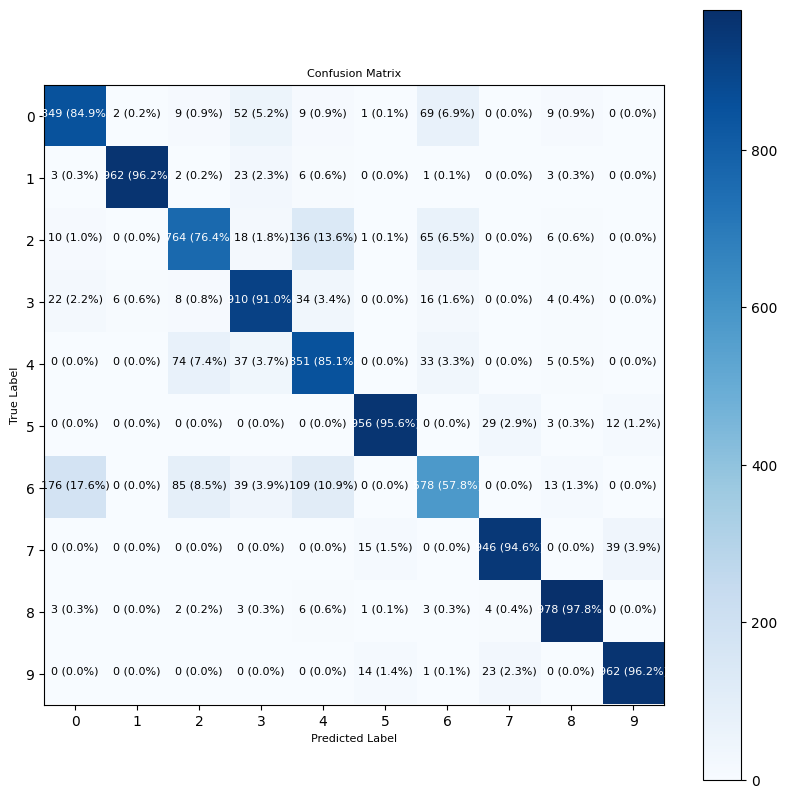

In [40]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_pred,
                      figsize=(10,10),
                      text_size=8)

## 5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [41]:
def softmax(logits):
    # Soustraire le max pour la stabilité numérique
    exp_shifted = tf.exp(logits - tf.reduce_max(logits, axis=-1, keepdims=True))
    # Calcule du softmax pour chaque ensemble de logits
    softmax_vals = exp_shifted / tf.reduce_sum(exp_shifted, axis=-1, keepdims=True)
    return softmax_vals

In [42]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(64, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(16, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=output_shape, activation=softmax)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=best_lr),
                metrics=tf.keras.metrics.SparseCategoricalAccuracy())

# Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Fit the model
model_5.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_accuracy = model_5.evaluate(test_data_norm, test_labels)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/40
1875/1875 [==============================] - 12s 4ms/step - loss: 0.5340 - sparse_categorical_accuracy: 0.8073 - val_loss: 0.4491 - val_sparse_categorical_accuracy: 0.8370
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4007 - sparse_categorical_accuracy: 0.8536 - val_loss: 0.4604 - val_sparse_categorical_accuracy: 0.8413
Epoch 3/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3720 - sparse_categorical_accuracy: 0.8651 - val_loss: 0.4073 - val_sparse_categorical_accuracy: 0.8512
Epoch 4/40
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3531 - sparse_categorical_accuracy: 0.8708 - val_loss: 0.3965 - val_sparse_categorical_accuracy: 0.8577
Epoch 5/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3400 - sparse_categorical_accuracy: 0.8761 - val_loss: 0.3784 - val_sparse_categorical_accuracy: 0.8650
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3266 - spar

## 6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the classification tutorial in the TensorFlow documentation for ideas.

In [51]:
import random
def plot_three_random_images(model, images, true_labels, classes):
  random_indices = random.sample(range(len(images)), 3)
  plt.figure(figsize=(10, 10))
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    idx = random_indices[i]

    # Create prediction and targets
    target_image = images[idx]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[idx]]

    # Plot the images
    plt.imshow(images[idx], cmap=plt.cm.binary)
    plt.title(f"Image {i + 1}")

    # Change the color of the titles depending on if the prediction is right or
    # wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel(f"Pred: {pred_label} ({100 * tf.reduce_max(pred_probs):2.0f}%) (True: {true_label})", color=color)

    plt.xticks([])
    plt.yticks([])

  plt.tight_layout()
  plt.show()

In [52]:
# Create a small list so we can index onto our training labels so they're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

1/1 [==============================] - 0s 21ms/step


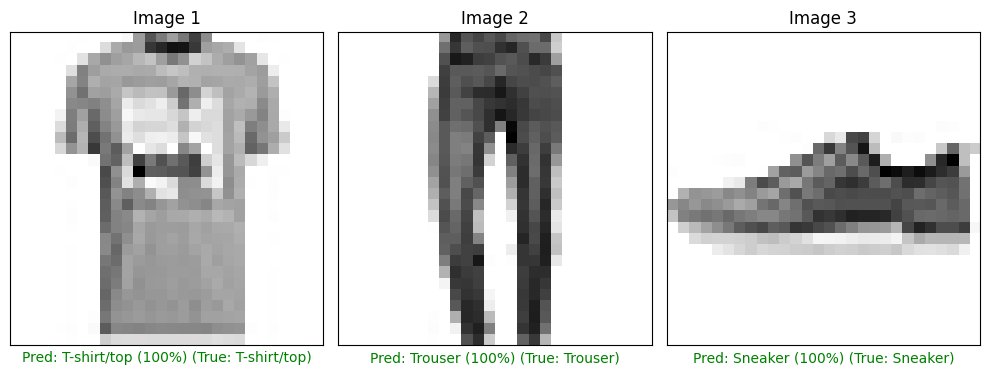

In [54]:
plot_three_random_images(model=model_5, images=test_data_norm, true_labels=test_labels, classes=class_names)

## 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [73]:
def plot_images_of_class(model, images, true_labels, class_name, classes=class_names):
  class_index = class_names.index(class_name)
  num_images = 3
  class_images = images[true_labels == class_index]
  random_indices = random.sample(range(len(class_images)), num_images)
  plt.figure(figsize=(10, 10))

  for i, idx in enumerate(random_indices):
    ax = plt.subplot(1, num_images, i + 1)
    target_image = class_images[idx]

    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[idx]]

    plt.imshow(target_image, cmap=plt.cm.binary)
    plt.title(f"Image {i + 1}")

    # Change the color of the titles depending on if the prediction is right or
    # wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel(f"Pred: {pred_label} ({100 * tf.reduce_max(pred_probs):2.0f}%) (True: {true_label})", color=color)
    plt.xticks([])
    plt.yticks([])

  plt.tight_layout()
  plt.show()

1/1 [==============================] - 0s 18ms/step


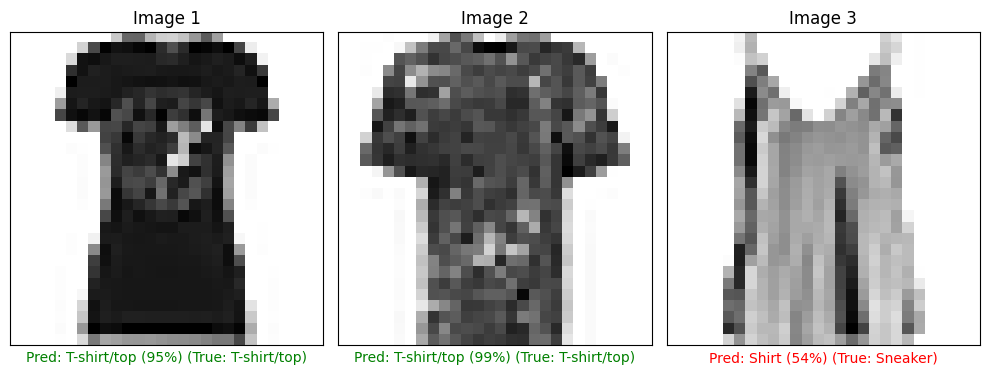

In [75]:
plot_images_of_class(model=model_5, images=test_data_norm, true_labels=test_labels, class_name="T-shirt/top")